In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
pd.set_option('display.max_columns',None)
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
pd.set_option('display.max_rows',None)
from patsy import dmatrices
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
gs=pd.read_csv(r'C:\Users\shree\Downloads\Projects\globalsale.csv')
gs.head()

,Row_ID,Application,Device,Launch_Year,Domain,Developer_comapny,Indian_Sales,China_Sales,Korea_Sales,Other_Sales,Global_Sales,ScorebyCritic,No_ofCritics,ScorebyUser,No_ofUsers,Developer,Overall_Rating
0,0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
gs.shape

(14748, 17)

In [4]:
gs.describe()

,Row_ID,Launch_Year,Indian_Sales,China_Sales,Korea_Sales,Other_Sales,Global_Sales,ScorebyCritic,No_ofCritics,No_ofUsers
count,14748.00000,14517.000000,14748.000000,14748.000000,14748.000000,14748.000000,14748.000000,7526.000000,7526.000000,7047.000000
mean,7373.50000,2006.217676,0.273585,0.149364,0.079891,0.048842,0.551876,69.181637,26.830853,161.749255
std,4257.52522,5.944182,0.728272,0.456193,0.286014,0.159235,1.372658,13.833710,19.094734,555.912492
min,0.00000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.020000,13.000000,3.000000,4.000000
25%,3686.75000,2003.000000,0.020000,0.000000,0.000000,0.000000,0.080000,61.000000,12.000000,10.000000
50%,7373.50000,2007.000000,0.090000,0.030000,0.000000,0.010000,0.200000,71.000000,22.000000,24.000000
75%,11060.25000,2010.000000,0.260000,0.120000,0.050000,0.040000,0.510000,80.000000,37.000000,82.000000
max,14747.00000,2020.000000,41.360000,28.960000,10.220000,8.450000,82.530000,98.000000,113.000000,10665.000000


In [5]:
gs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14748 entries, 0 to 14747
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Row_ID             14748 non-null  int64  
 1   Application        14746 non-null  object 
 2   Device             14748 non-null  object 
 3   Launch_Year        14517 non-null  float64
 4   Domain             14746 non-null  object 
 5   Developer_comapny  14707 non-null  object 
 6   Indian_Sales       14748 non-null  float64
 7   China_Sales        14748 non-null  float64
 8   Korea_Sales        14748 non-null  float64
 9   Other_Sales        14748 non-null  float64
 10  Global_Sales       14748 non-null  float64
 11  ScorebyCritic      7526 non-null   float64
 12  No_ofCritics       7526 non-null   float64
 13  ScorebyUser        9166 non-null   object 
 14  No_ofUsers         7047 non-null   float64
 15  Developer          9226 non-null   object 
 16  Overall_Rating     911

#### Steps involved in any model building 
1. identify the problem of organisation /requirement.
2. gather the data / Collect the data.
3. data cleansing, data preparation, getting familier with data.
4. if required do the exploratory analysis (plots, graphs).
5. for the predictive modeling (train-test).
6. build / train the model.
7. test the model(use evaluation matrices to check how the model is behaving).

In [6]:
gs.isna().sum()

Row_ID                  0
Application             2
Device                  0
Launch_Year           231
Domain                  2
Developer_comapny      41
Indian_Sales            0
China_Sales             0
Korea_Sales             0
Other_Sales             0
Global_Sales            0
ScorebyCritic        7222
No_ofCritics         7222
ScorebyUser          5582
No_ofUsers           7701
Developer            5522
Overall_Rating       5630
dtype: int64

In [7]:
gs.isna().mean()

Row_ID               0.000000
Application          0.000136
Device               0.000000
Launch_Year          0.015663
Domain               0.000136
Developer_comapny    0.002780
Indian_Sales         0.000000
China_Sales          0.000000
Korea_Sales          0.000000
Other_Sales          0.000000
Global_Sales         0.000000
ScorebyCritic        0.489694
No_ofCritics         0.489694
ScorebyUser          0.378492
No_ofUsers           0.522172
Developer            0.374424
Overall_Rating       0.381747
dtype: float64

In [8]:
print(gs.Application.value_counts())

Need for Speed: Most Wanted                                                                                                             12
Ratatouille                                                                                                                              9
Madden NFL 07                                                                                                                            9
LEGO Marvel Super Heroes                                                                                                                 9
FIFA 14                                                                                                                                  9
Lego Batman 3: Beyond Gotham                                                                                                             8
LEGO Harry Potter: Years 5-7                                                                                                             8
FIFA Soccer 13             

Name: Application, dtype: int64


In [9]:
print(gs.Launch_Year.value_counts())

2009.0    1258
2008.0    1230
2010.0    1070
2007.0    1027
2011.0    1000
2005.0     861
2006.0     842
2002.0     751
2003.0     713
2004.0     698
2012.0     552
2014.0     501
2015.0     493
2013.0     468
2001.0     457
1998.0     366
2016.0     366
2000.0     336
1999.0     319
1997.0     276
1996.0     253
1995.0     211
1994.0     114
1993.0      59
1981.0      44
1992.0      42
1991.0      41
1982.0      33
1986.0      21
1983.0      17
1989.0      16
1987.0      16
1990.0      15
1988.0      14
1984.0      13
1985.0      13
1980.0       9
2017.0       1
2020.0       1
Name: Launch_Year, dtype: int64


In [10]:
gs.Domain.value_counts()

Action          2995
Sports          2169
Misc            1558
Role-Playing    1344
Shooter         1188
Racing          1119
Adventure        927
Platform         832
Fighting         789
Simulation       773
Strategy         565
Puzzle           487
Name: Domain, dtype: int64

In [11]:
gs.Developer_comapny.value_counts()

Electronic Arts                           1294
Activision                                 927
Ubisoft                                    865
Namco Bandai Games                         841
Konami Digital Entertainment               763
THQ                                        691
Nintendo                                   663
Sony Computer Entertainment                654
Sega                                       585
Take-Two Interactive                       397
Capcom                                     355
Atari                                      331
Tecmo Koei                                 291
Warner Bros. Interactive Entertainment     228
Square Enix                                214
Disney Interactive Studios                 207
Midway Games                               181
Microsoft Game Studios                     180
Acclaim Entertainment                      178
505 Games                                  176
Eidos Interactive                          174
Unknown      

In [12]:
gs.ScorebyCritic.value_counts()

70.0    239
71.0    236
75.0    230
73.0    225
80.0    224
78.0    222
76.0    221
74.0    214
68.0    212
77.0    211
79.0    206
72.0    205
81.0    203
83.0    198
69.0    197
82.0    194
66.0    186
65.0    177
84.0    173
67.0    162
63.0    160
64.0    159
61.0    154
62.0    148
60.0    145
59.0    145
85.0    145
58.0    129
86.0    129
57.0    115
87.0    110
88.0    107
56.0    105
55.0    100
89.0     98
54.0     97
53.0     96
51.0     82
49.0     81
50.0     73
90.0     70
91.0     64
52.0     64
47.0     62
48.0     60
92.0     54
46.0     51
43.0     50
44.0     46
45.0     43
93.0     43
94.0     36
39.0     34
42.0     32
38.0     30
41.0     26
37.0     26
36.0     24
35.0     23
40.0     20
33.0     19
96.0     18
32.0     15
95.0     13
28.0     10
34.0     10
30.0      9
26.0      9
97.0      7
25.0      7
31.0      7
27.0      7
19.0      5
98.0      4
29.0      3
20.0      3
24.0      3
23.0      2
17.0      1
22.0      1
13.0      1
21.0      1
Name: ScorebyCri

In [13]:
gs.No_ofCritics.value_counts()

4.0      277
5.0      248
11.0     221
7.0      217
17.0     216
8.0      214
9.0      212
12.0     207
10.0     205
16.0     201
6.0      200
14.0     196
15.0     190
13.0     187
18.0     181
22.0     177
21.0     172
19.0     171
23.0     162
25.0     155
20.0     154
30.0     142
24.0     141
26.0     138
28.0     129
27.0     127
33.0     126
31.0     123
29.0     113
34.0     113
32.0     101
37.0      96
35.0      96
41.0      92
39.0      88
38.0      85
36.0      79
43.0      77
42.0      76
46.0      71
44.0      70
45.0      63
40.0      60
51.0      58
50.0      55
49.0      55
55.0      55
48.0      52
54.0      52
47.0      52
52.0      45
56.0      43
59.0      42
53.0      41
57.0      33
61.0      32
58.0      31
65.0      30
69.0      30
70.0      29
60.0      26
64.0      25
75.0      23
62.0      22
66.0      21
63.0      20
71.0      19
67.0      18
74.0      18
68.0      17
76.0      16
73.0      16
81.0      15
82.0      15
72.0      13
77.0      13
83.0      13

In [14]:
gs.ScorebyUser.value_counts()

tbd    2119
7.8     308
8       271
8.2     265
8.5     239
7.5     233
7.9     229
8.3     229
8.1     227
7.7     224
7.3     219
8.4     212
7.4     203
7       203
7.6     201
8.6     195
6.8     179
8.8     174
8.7     172
7.1     163
7.2     160
8.9     147
6.6     141
6.9     136
6.3     128
6.7     119
6       117
6.5     114
9       114
6.2     103
6.4      99
5.8      88
9.1      87
6.1      79
5.9      73
5.6      70
5.7      69
5.4      67
5.3      65
5.5      64
5        61
5.2      55
4.8      45
5.1      40
9.2      39
4.9      38
4.6      34
4.4      33
4.3      32
4.1      31
4.5      30
9.3      29
3.8      26
3.5      26
4.2      25
3.4      22
4.7      22
4        22
2.8      20
3        20
3.1      19
3.6      18
3.7      16
3.3      14
2.5      12
3.2      10
3.9      10
9.4      10
2         9
2.9       9
1.7       9
2.1       8
2.4       8
2.7       7
2.2       5
1.8       5
2.6       4
9.5       4
1.6       3
1.2       3
1.4       3
0.7       2
0.3       2
1.3 

In [15]:
gs.ScorebyUser.unique()

array(['8', nan, '8.3', '8.5', '7.8', '8.9', '7.9', '8.7', '8.4', '7.5',
       '6.3', '2.6', '7.2', '9.2', '7', '9', '7.3', '4.3', '8.2', '7.4',
       '6.6', '7.6', '8.6', '5.7', '5', '9.1', '6.5', '7.7', 'tbd', '8.8',
       '6.9', '6.4', '7.1', '8.1', '9.4', '6.8', '6.1', '6.7', '5.4', '4',
       '3.4', '4.8', '4.9', '4.5', '9.3', '6.2', '4.2', '6', '3.7', '4.1',
       '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9', '5.3', '3.2',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2', '9.6',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [16]:
gs.No_ofUsers.value_counts()

6.0        321
4.0        312
5.0        296
8.0        262
7.0        251
9.0        223
10.0       179
11.0       165
13.0       153
12.0       152
14.0       139
15.0       135
16.0       133
17.0       129
19.0       115
18.0       112
21.0       109
20.0       103
22.0        90
24.0        79
25.0        72
26.0        72
27.0        70
23.0        69
28.0        67
31.0        64
29.0        59
30.0        58
34.0        49
37.0        48
35.0        45
36.0        44
33.0        44
39.0        43
41.0        42
44.0        40
46.0        39
40.0        39
47.0        38
32.0        38
38.0        37
45.0        37
49.0        33
48.0        31
57.0        31
43.0        29
51.0        29
55.0        27
60.0        26
52.0        26
65.0        24
42.0        24
54.0        23
53.0        23
87.0        22
77.0        21
69.0        21
63.0        21
70.0        21
50.0        20
56.0        19
72.0        19
58.0        18
62.0        18
61.0        18
89.0        17
71.0      

In [17]:
gs.Developer.value_counts()

Ubisoft                                                                             196
EA Sports                                                                           168
EA Canada                                                                           159
Konami                                                                              148
Capcom                                                                              134
EA Tiburon                                                                          104
Electronic Arts                                                                      98
Ubisoft Montreal                                                                     95
Visual Concepts                                                                      95
Omega Force                                                                          77
Vicarious Visions                                                                    75
Traveller's Tales               

In [18]:
gs.Overall_Rating.value_counts()

E       3643
T       2710
M       1443
E10+    1309
EC         8
RP         2
K-A        2
AO         1
Name: Overall_Rating, dtype: int64

In [19]:
gs.isna().sum()

Row_ID                  0
Application             2
Device                  0
Launch_Year           231
Domain                  2
Developer_comapny      41
Indian_Sales            0
China_Sales             0
Korea_Sales             0
Other_Sales             0
Global_Sales            0
ScorebyCritic        7222
No_ofCritics         7222
ScorebyUser          5582
No_ofUsers           7701
Developer            5522
Overall_Rating       5630
dtype: int64

In [20]:
gs.isna().mean()

Row_ID               0.000000
Application          0.000136
Device               0.000000
Launch_Year          0.015663
Domain               0.000136
Developer_comapny    0.002780
Indian_Sales         0.000000
China_Sales          0.000000
Korea_Sales          0.000000
Other_Sales          0.000000
Global_Sales         0.000000
ScorebyCritic        0.489694
No_ofCritics         0.489694
ScorebyUser          0.378492
No_ofUsers           0.522172
Developer            0.374424
Overall_Rating       0.381747
dtype: float64

In [21]:
gs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14748 entries, 0 to 14747
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Row_ID             14748 non-null  int64  
 1   Application        14746 non-null  object 
 2   Device             14748 non-null  object 
 3   Launch_Year        14517 non-null  float64
 4   Domain             14746 non-null  object 
 5   Developer_comapny  14707 non-null  object 
 6   Indian_Sales       14748 non-null  float64
 7   China_Sales        14748 non-null  float64
 8   Korea_Sales        14748 non-null  float64
 9   Other_Sales        14748 non-null  float64
 10  Global_Sales       14748 non-null  float64
 11  ScorebyCritic      7526 non-null   float64
 12  No_ofCritics       7526 non-null   float64
 13  ScorebyUser        9166 non-null   object 
 14  No_ofUsers         7047 non-null   float64
 15  Developer          9226 non-null   object 
 16  Overall_Rating     911

In [22]:
gs.Launch_Year=gs.Launch_Year.fillna(2009)
gs.Developer_comapny=gs.Developer_comapny.fillna('Electronic Arts')
gs.Domain=gs.Domain.fillna('Action')
gs.Application=gs.Application.fillna('Need for Speed: Most Wanted')

In [23]:
gs.ScorebyCritic=gs.ScorebyCritic.fillna(method='ffill')
gs.No_ofCritics=gs.No_ofCritics.fillna(method='ffill')
gs.No_ofUsers=gs.No_ofUsers.fillna(method='ffill')
gs.Developer=gs.Application.fillna(method='ffill')
gs.Overall_Rating=gs.Overall_Rating.fillna(method='ffill')
gs.ScorebyUser=gs.ScorebyUser.fillna(method='ffill')

In [24]:
#gs.Developer=gs.Developer.fillna('Ubisoft')
#gs.Overall_Rating=gs.Overall_Rating.fillna('E')

In [25]:
#gs.Launch_Year=gs.Launch_Year.fillna(2009)
#gs.Developer_comapny=gs.Developer_comapny.fillna('Electronic Arts')
#gs.ScorebyCritic=gs.ScorebyCritic.fillna(gs.ScorebyCritic.median())
#gs.No_ofCritics=gs.No_ofCritics.fillna(gs.No_ofCritics.median())
#gs.No_ofUsers=gs.No_ofUsers.fillna(gs.No_ofUsers.median())
#gs.ScorebyUser=gs.ScorebyUser.fillna('tbd')
#gs.Developer=gs.Developer.fillna('Ubisoft')
#gs.Overall_Rating=gs.Overall_Rating.fillna('E')
#gs.Application=gs.Application.fillna('Need for Speed: Most Wanted')
#gs.Domain=gs.Domain.fillna('Action')

In [26]:
gs.isna().sum()

Row_ID               0
Application          0
Device               0
Launch_Year          0
Domain               0
Developer_comapny    0
Indian_Sales         0
China_Sales          0
Korea_Sales          0
Other_Sales          0
Global_Sales         0
ScorebyCritic        0
No_ofCritics         0
ScorebyUser          0
No_ofUsers           0
Developer            0
Overall_Rating       0
dtype: int64

In [27]:
gs.shape

(14748, 17)

In [28]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
gs[gs.select_dtypes(include=['object']).columns]=gs[gs.select_dtypes(include=['object']).columns].apply(le.fit_transform)

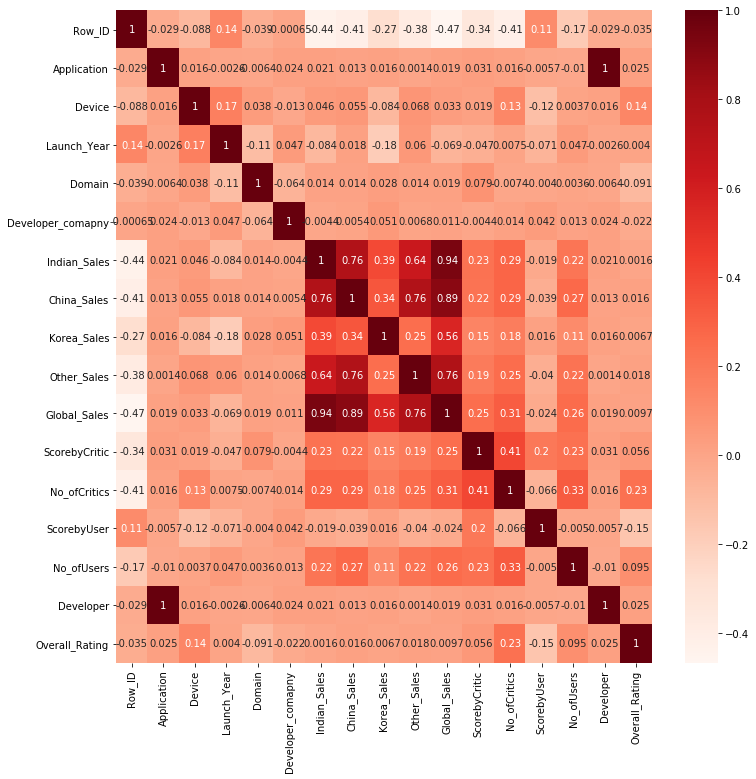

In [29]:
plt.figure(figsize=(12,12))
cor = gs.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [30]:
gs1=gs.drop(['Row_ID','Other_Sales','Developer'],axis=1)

In [31]:
gs1.head()

,Application,Device,Launch_Year,Domain,Developer_comapny,Indian_Sales,China_Sales,Korea_Sales,Global_Sales,ScorebyCritic,No_ofCritics,ScorebyUser,No_ofUsers,Overall_Rating
0,9756,26,2006.0,10,321,41.36,28.96,3.77,82.53,76.0,51.0,77,322.0,1
1,8272,11,1985.0,4,321,29.08,3.58,6.81,40.24,76.0,51.0,77,322.0,1
2,4953,26,2008.0,6,321,15.68,12.76,3.79,35.52,82.0,73.0,80,709.0,1
3,9758,26,2009.0,10,321,15.61,10.93,3.28,32.77,80.0,73.0,77,192.0,1
4,6533,5,1996.0,7,321,11.27,8.89,10.22,31.37,80.0,73.0,77,192.0,1


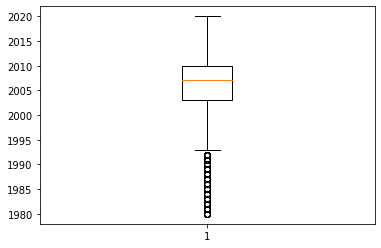

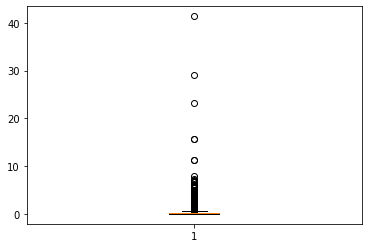

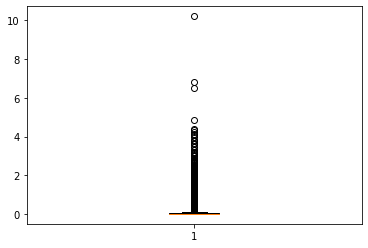

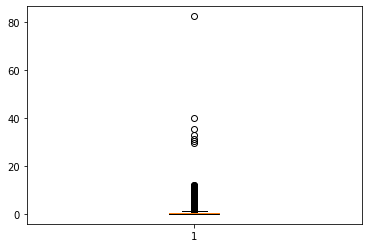

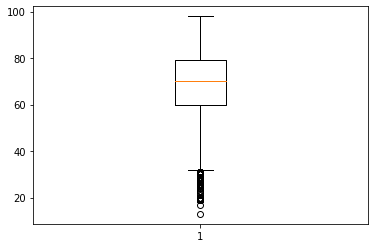

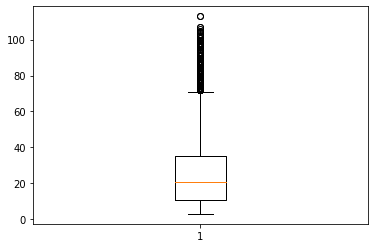

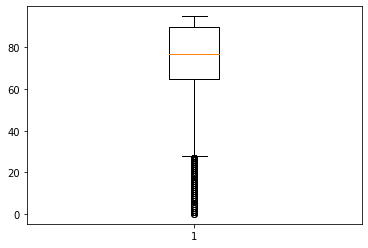

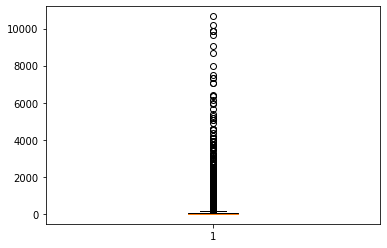

In [32]:
col=[gs1.Launch_Year,gs1.Indian_Sales,gs1.Korea_Sales,gs1.Global_Sales,gs1.ScorebyCritic,gs1.No_ofCritics,gs1.ScorebyUser,gs1.No_ofUsers]
for i in col:
    plt.figure()
    plt.boxplot([i])

In [33]:
gs1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14748 entries, 0 to 14747
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Application        14748 non-null  int32  
 1   Device             14748 non-null  int32  
 2   Launch_Year        14748 non-null  float64
 3   Domain             14748 non-null  int32  
 4   Developer_comapny  14748 non-null  int32  
 5   Indian_Sales       14748 non-null  float64
 6   China_Sales        14748 non-null  float64
 7   Korea_Sales        14748 non-null  float64
 8   Global_Sales       14748 non-null  float64
 9   ScorebyCritic      14748 non-null  float64
 10  No_ofCritics       14748 non-null  float64
 11  ScorebyUser        14748 non-null  int32  
 12  No_ofUsers         14748 non-null  float64
 13  Overall_Rating     14748 non-null  int32  
dtypes: float64(8), int32(6)
memory usage: 1.2 MB


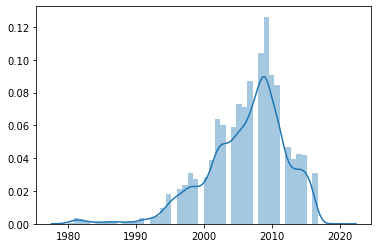

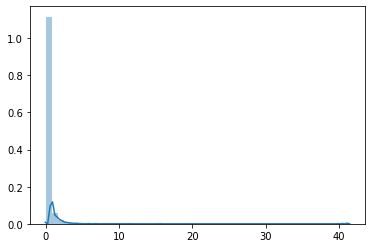

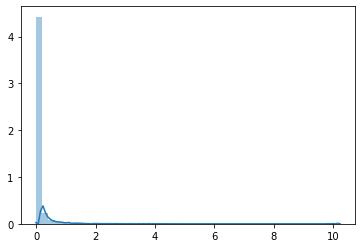

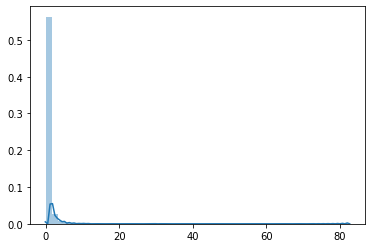

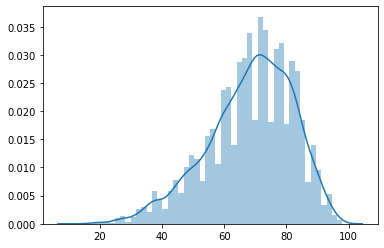

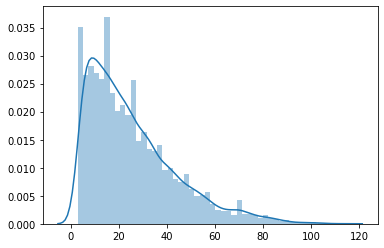

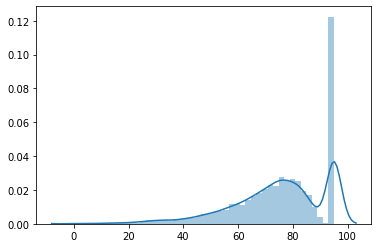

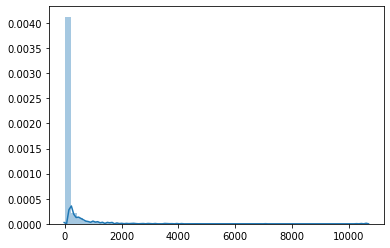

In [34]:
col=[gs1.Launch_Year,gs1.Indian_Sales,gs1.Korea_Sales,gs1.Global_Sales,gs1.ScorebyCritic,gs1.No_ofCritics,gs1.ScorebyUser,gs1.No_ofUsers]
for i in col:
    plt.figure()
    sns.distplot([i])

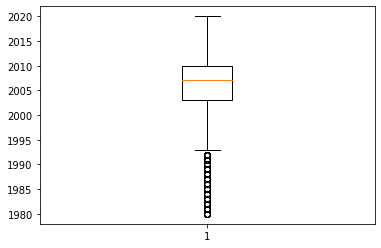

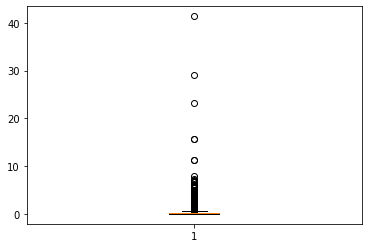

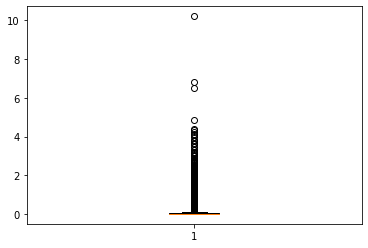

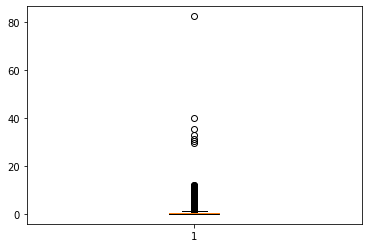

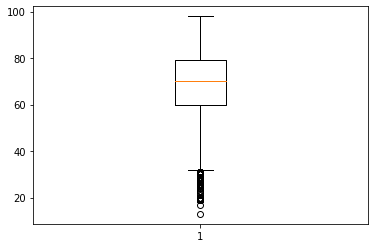

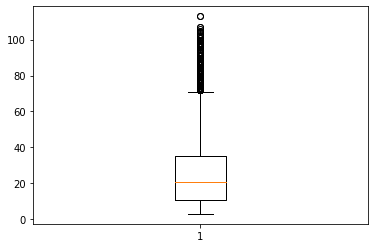

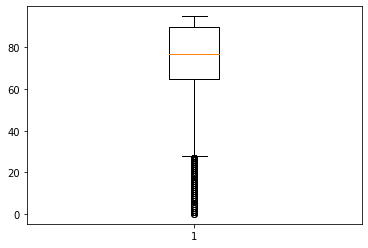

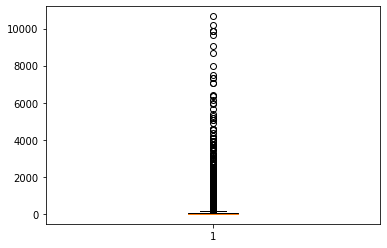

In [35]:
col=[gs1.Launch_Year,gs1.Indian_Sales,gs1.Korea_Sales,gs1.Global_Sales,gs1.ScorebyCritic,gs1.No_ofCritics,gs1.ScorebyUser,gs1.No_ofUsers]
for i in col:
    plt.figure()
    plt.boxplot([i])

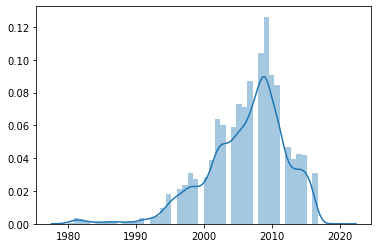

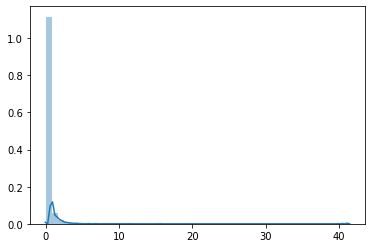

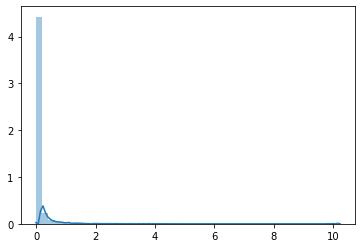

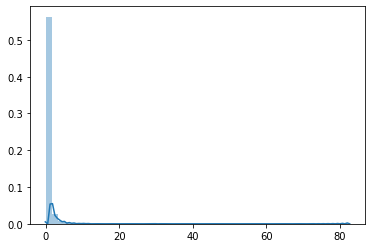

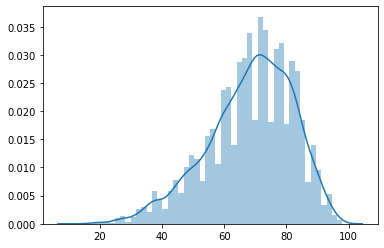

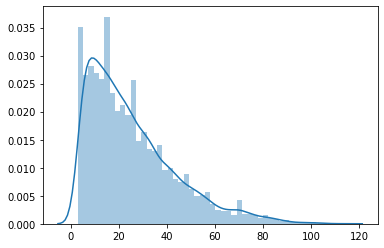

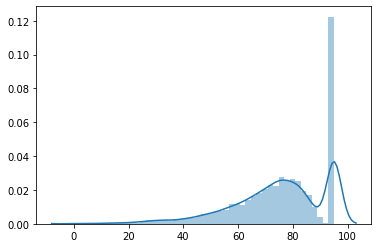

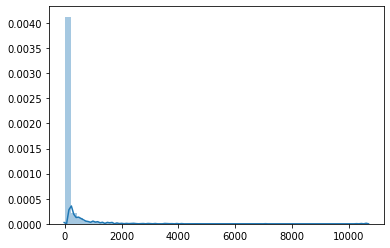

In [36]:
col=[gs1.Launch_Year,gs1.Indian_Sales,gs1.Korea_Sales,gs1.Global_Sales,gs1.ScorebyCritic,gs1.No_ofCritics,gs1.ScorebyUser,gs1.No_ofUsers]
for i in col:
    plt.figure()
    sns.distplot([i])

In [37]:
gs1.Indian_Sales=np.sqrt(gs1.Indian_Sales)
gs1.Korea_Sales=np.sqrt(gs1.Korea_Sales)
gs1.Global_Sales=np.sqrt(gs1.Global_Sales)
gs1.No_ofCritics=np.sqrt(gs1.No_ofCritics)
gs1.ScorebyUser=np.sqrt(gs1.ScorebyUser)
gs1.No_ofUsers=np.sqrt(gs1.No_ofUsers)

In [38]:
gs1_x=gs1.loc[:,gs1.columns!='Global_Sales']
gs1_y=gs1.loc[:,gs1.columns=='Global_Sales']

In [39]:
gs1_x_train,gs1_x_test,gs1_y_train,gs1_y_test=train_test_split(gs1_x,gs1_y,test_size=.2)

In [40]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(gs1_x_train, gs1_y_train) #model has been bulit
pred_value = reg.predict(gs1_x_test)
pred_value

array([[0.81759796],
       [0.13969928],
       [0.98873261],
       ...,
       [0.61703098],
       [0.34633089],
       [0.98820159]])

In [41]:
reg.intercept_ #intercept Bo

array([0.52978273])

In [42]:
(reg.coef_)

array([[ 3.91879085e-07,  7.48638591e-04, -2.02218393e-04,
         1.29586278e-03, -2.84423180e-06,  8.07432329e-01,
         3.05872848e-01,  5.41726597e-01,  1.38565063e-03,
         5.59314571e-03, -1.21594476e-02,  1.21407895e-03,
        -1.04232517e-03]])

In [43]:
reg.score(gs1_x_train,gs1_y_train)  #this is the R square value

0.9429816186611468

In [44]:
gs1_x_train.shape

(11798, 13)

In [45]:
K=12
N=11798
Rsq=reg.score(gs1_x_train,gs1_y_train)
Adr_Rsquare=1-(1-Rsq)*(N-1)/(N-K-1)

print('Rsquare value is .........>',Rsq)
print('Adj Rsquarevalue is ........>',Adr_Rsquare)

Rsquare value is .........> 0.9429816186611468
Adj Rsquarevalue is ........> 0.9429235600632625


In [46]:
from sklearn import metrics
print('MAE  =  ',metrics.mean_absolute_error(gs1_y_test,pred_value))
print('MAPE  =  ',metrics.mean_absolute_percentage_error(gs1_y_test,pred_value))
print('MSE  =  ',metrics.mean_squared_error(gs1_y_test,pred_value))
print('RMSE  =  ',np.sqrt(metrics.mean_squared_error(gs1_y_test,pred_value)))

MAE  =   0.07491917443996288
MAPE  =   0.16694921541296626
MSE  =   0.023121422066165555
RMSE  =   0.15205729862839718


### Feature Selection

In [47]:
mylist = ['Application', 'Device', 'Launch_Year', 'Domain', 'Developer_comapny','Indian_Sales', 'China_Sales', 'Korea_Sales', 'ScorebyCritic','No_ofCritics', 'ScorebyUser', 'No_ofUsers', 'Overall_Rating']

In [48]:
coef=[ 5.15316036e-07,  6.99887894e-04,  4.82619058e-05,9.27830997e-04, -1.94577533e-06,  8.49372249e-01,2.18404613e-01,  5.61944081e-01,  1.47831159e-03,5.97683498e-03, -1.31754868e-02,  1.88262586e-03,-1.50407420e-03]

In [49]:
feature_importance=pd.DataFrame({'Features':mylist,'Importance':coef})
feature_importance

,Features,Importance
0,Application,5.153160e-07
1,Device,6.998879e-04
2,Launch_Year,4.826191e-05
3,Domain,9.278310e-04
4,Developer_comapny,-1.945775e-06
5,Indian_Sales,8.493722e-01
6,China_Sales,2.184046e-01
7,Korea_Sales,5.619441e-01
8,ScorebyCritic,1.478312e-03
9,No_ofCritics,5.976835e-03


In [50]:
from sklearn.linear_model import Lasso
lasso=Lasso()
lasso.fit(gs1_x_train,gs1_y_train)

Lasso()

In [51]:
lasso.coef_
lasso_coef=[3.28953074e-06,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,5.82125919e-03,  0.00000000e+00, -0.00000000e+00,  4.27651457e-03,0.00000000e+00]

In [52]:
from sklearn.linear_model import Ridge
ridge=Ridge()
ridge.fit(gs1_x_train,gs1_y_train)

Ridge()

In [53]:
ridge.coef_
ridge_coef=[5.16682995e-07,  6.99980980e-04,  3.29808876e-05,9.25137430e-04, -1.85287162e-06,  8.48333819e-01,2.18824007e-01,  5.60846735e-01,  1.48293886e-03,6.02784631e-03, -1.31930035e-02,  1.88819684e-03,-1.51211903e-03]

In [54]:
feature=pd.DataFrame({'Features':mylist,'Linear':coef,'Lasso':lasso_coef,'Ridge':ridge_coef})
feature

,Features,Linear,Lasso,Ridge
0,Application,5.153160e-07,0.000003,5.166830e-07
1,Device,6.998879e-04,0.000000,6.999810e-04
2,Launch_Year,4.826191e-05,-0.000000,3.298089e-05
3,Domain,9.278310e-04,0.000000,9.251374e-04
4,Developer_comapny,-1.945775e-06,0.000000,-1.852872e-06
5,Indian_Sales,8.493722e-01,0.000000,8.483338e-01
6,China_Sales,2.184046e-01,0.000000,2.188240e-01
7,Korea_Sales,5.619441e-01,0.000000,5.608467e-01
8,ScorebyCritic,1.478312e-03,0.005821,1.482939e-03
9,No_ofCritics,5.976835e-03,0.000000,6.027846e-03


In [55]:
final_feature=feature.sort_values(by=['Ridge'], ascending=False)
final_feature

,Features,Linear,Lasso,Ridge
5,Indian_Sales,8.493722e-01,0.000000,8.483338e-01
7,Korea_Sales,5.619441e-01,0.000000,5.608467e-01
6,China_Sales,2.184046e-01,0.000000,2.188240e-01
9,No_ofCritics,5.976835e-03,0.000000,6.027846e-03
11,No_ofUsers,1.882626e-03,0.004277,1.888197e-03
8,ScorebyCritic,1.478312e-03,0.005821,1.482939e-03
3,Domain,9.278310e-04,0.000000,9.251374e-04
1,Device,6.998879e-04,0.000000,6.999810e-04
2,Launch_Year,4.826191e-05,-0.000000,3.298089e-05
0,Application,5.153160e-07,0.000003,5.166830e-07


In [56]:
gs1_x_train.shape

(11798, 13)

In [57]:
gs2=gs1.drop(['Developer_comapny','Overall_Rating','ScorebyUser'],axis=1)

In [58]:
gs2_x=gs2.loc[:,gs2.columns!='Global_Sales']
gs2_y=gs2.loc[:,gs2.columns=='Global_Sales']

In [59]:
gs2_x_train,gs2_x_test,gs2_y_train,gs2_y_test=train_test_split(gs2_x,gs2_y,test_size=.2)

In [60]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(gs2_x_train, gs2_y_train) #model has been bulit
pred_value2 = reg.predict(gs2_x_test)
pred_value2

array([[0.52372216],
       [0.66669751],
       [0.78391062],
       ...,
       [0.4363934 ],
       [0.36479283],
       [0.70151035]])

In [61]:
reg.intercept_ #intercept Bo

array([0.4253512])

In [62]:
reg.coef_

array([[ 4.82988160e-07,  8.10962604e-04, -1.97691612e-04,
         1.56724407e-03,  8.10355876e-01,  3.07276229e-01,
         5.37238931e-01,  1.08301749e-03,  6.18977341e-03,
         1.18953745e-03]])

In [63]:
reg.score(gs2_x_train,gs2_y_train)  #this is the R square value

0.9431492740873441

In [64]:
gs2_x_train.shape

(11798, 10)

In [65]:
#adjusted R square
#1-(1-Rsq)*(N-1)/(n-k-1)
#k=15
#N=11798

In [66]:
K=10
N=11798
Rsq=reg.score(gs2_x_train,gs2_y_train)
Adr_Rsquare=1-(1-Rsq)*(N-1)/(N-K-1)

print('Rsquare value is .........>',Rsq)
print('Adj Rsquarevalue is ........>',Adr_Rsquare)

Rsquare value is .........> 0.9431492740873441
Adj Rsquarevalue is ........> 0.9431010423694237


In [67]:
from sklearn import metrics
print('MAE  =  ',metrics.mean_absolute_error(gs2_y_test,pred_value2))
print('MAPE  =  ',metrics.mean_absolute_percentage_error(gs2_y_test,pred_value2))
print('MSE  =  ',metrics.mean_squared_error(gs2_y_test,pred_value2))
print('RMSE  =  ',np.sqrt(metrics.mean_squared_error(gs2_y_test,pred_value2)))

MAE  =   0.07640615083008477
MAPE  =   0.16620636828608895
MSE  =   0.024277054699687974
RMSE  =   0.15581095821439508


#### Lets check assumptions

#### Normality of errors : check if there is any pattern among errors or not

#### Homoscedasticity

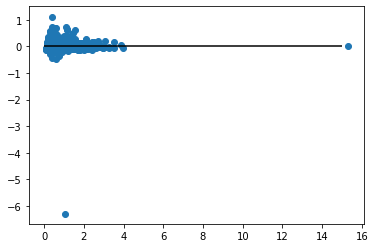

In [78]:
resid=gs2_y_test-pred_value2
plt.scatter(pred_value,resid)
plt.hlines(0,0,15)  ###plotting of residuals against predicted Y values

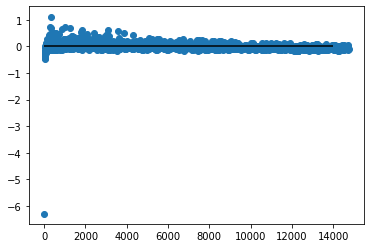

In [69]:
plt.scatter(resid.index,resid.values)
plt.hlines(0,0,14000)

#### If there is 0= Negative serial correlation, 2= no correlation, 4= Positive correlation

In [70]:
from statsmodels.stats.stattools import durbin_watson
durbin_watson(resid)   ####no serial correlation.........indepence of errors

array([1.97174869])

#### Check mean of zero for errors

In [71]:
pred_train=reg.predict(gs2_x_train)
error_train=gs2_y_train-pred_train
np.mean(error_train)#can i say this as zero

Global_Sales   -4.873576e-17
dtype: float64

#### Er

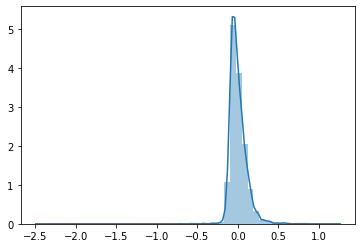

In [72]:
sns.distplot(error_train)

In [73]:
#skewness and kurtosis
from scipy.stats import kurtosis
from scipy.stats import skew

In [74]:
skew(error_train)  #it is close to zero

array([-0.90609579])

In [75]:
kurtosis(error_train)   #close to 3 

array([50.37355438])

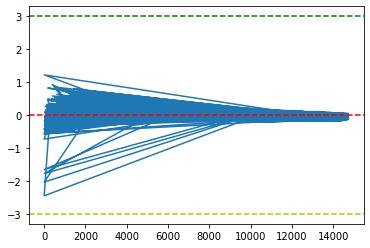

In [76]:
#
plt.plot(error_train)
plt.axhline(y=0,linestyle='--',color='r')
plt.axhline(y=3,linestyle='--',color='g')
plt.axhline(y=-3,linestyle='--',color='y')